# Iris Project :- Predict the class of the flower (classification techniques)
In this tutorial, we had used k nearest neighbor classification algorithm of machine learning to classify species of different iris flowers. K nearest neighbor is one of the widely used and powerful algorithm of machine learning, in which new data is been classified on the basis of its nearest neighbors. The k in the k nearest stands for the fact that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training(three or five)
then we can make a prediction using the majority class among these neighbor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
path = "B:\DATA_SCIENCE\Data_Science_Material\HAND_on_Project\Beginner\iris\iris.csv"
df = pd.read_csv(path)
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Here you can see our dataset is not labeled with columns, so firtsly we have to give file name

In [4]:
name = ['Sepal Length','Sepal width','Petal Length','Petal Width','class']
df = pd.read_csv(path, names = name)
df.head()

,Sepal Length,Sepal width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Summarizing the dataset

In [6]:
# shape
df.shape

(150, 5)

In [7]:
# Statistical Summary
df.describe()

,Sepal Length,Sepal width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Type od the dataset
df.dtypes

Sepal Length    float64
Sepal width     float64
Petal Length    float64
Petal Width     float64
class            object
dtype: object

In [10]:
# Check the null values
df.isnull().sum()

Sepal Length    0
Sepal width     0
Petal Length    0
Petal Width     0
class           0
dtype: int64

# Data Visualization

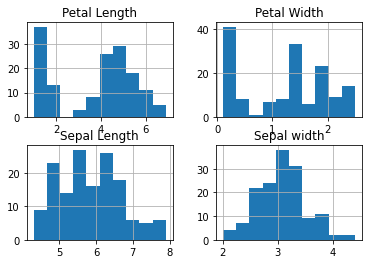

In [21]:
# Box and the Whishker Plots
import seaborn as sns
df.hist()
plt.show()

# Evaluate Some Algorithm

In [24]:
# Split the dataset for validation
X = df.iloc[:,0:4]
Y = df.iloc[:,4]

# allocate data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.20, random_state = 7)

In [28]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# Spot Check - Algorithm
Spot-checking algorithms is a part of the process of applied machine learning. On a new problem, you need to quickly determine which type or class of algorithms is good at picking out the structure in your problem and which are not.

In [34]:
# Firstly let's load all the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [35]:
# Now let's take all the model into list
models = []
models.append(('Logostic Regression', LogisticRegression()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('discriminant_analysis', LogisticRegression()))
models.append(('Logostic Regression', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('naive_bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))


In [40]:
# Evalute each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 7)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Logostic Regression: 0.983333 (0.033333)
Decision Tree Classifier: 0.975000 (0.038188)


c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


discriminant_analysis: 0.983333 (0.033333)
Logostic Regression: 0.975000 (0.038188)
KNeighborsClassifier: 0.983333 (0.033333)
naive_bayes: 0.975000 (0.053359)
Support Vector Machine: 0.983333 (0.033333)


c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Make Predictions
As we got the accuracy of all the model, well out of 07 , 04 model shown equal score

1. Logostic Regression: 0.983333 (0.033333)
2. Decision Tree Classifier: 0.975000 (0.038188)
3. discriminant_analysis: 0.983333 (0.033333)
4. Logostic Regression: 0.975000 (0.038188)
5. KNeighborsClassifier: 0.983333 (0.033333)
6. naive_bayes: 0.975000 (0.053359)
7. Support Vector Machine: 0.983333 (0.033333)

We can choose any one of them, but as per the dataset, it would better to make prediction on SVM

In [41]:
SVM = SVC()
SVM.fit(X_train, Y_train)
prediction = SVM.predict(X_test)
prediction

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [42]:
# let's do comparison with the actual data set
Y_test

149     Iris-virginica
84     Iris-versicolor
40         Iris-setosa
66     Iris-versicolor
106     Iris-virginica
41         Iris-setosa
52     Iris-versicolor
94     Iris-versicolor
11         Iris-setosa
51     Iris-versicolor
77     Iris-versicolor
85     Iris-versicolor
32         Iris-setosa
109     Iris-virginica
28         Iris-setosa
70     Iris-versicolor
108     Iris-virginica
137     Iris-virginica
46         Iris-setosa
37         Iris-setosa
82     Iris-versicolor
120     Iris-virginica
63     Iris-versicolor
119     Iris-virginica
129     Iris-virginica
138     Iris-virginica
97     Iris-versicolor
80     Iris-versicolor
101     Iris-virginica
140     Iris-virginica
Name: class, dtype: object

Well we are not able to compare all the data, so for this we will apply confusion matrix

# Confusion Matrix


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction)
cm

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  2,  9]], dtype=int64)

Now we can check, in our test data, we had 30 data, bur as we seeing, out of 30, 26 is rght prediction, you can calculate while adding daigonaly. And 04 is wrong prediction

Let's check the accuracy


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, prediction)

0.8666666666666667

In [46]:
# Let's get the Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

